In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter

In [46]:
Fifa_22_database = pd.read_csv("C:\\Users\\welcome\\Desktop\\Msc Data Science Cov Uni\\Final project work\\fifa_2022_datasets\\players_22.csv",low_memory=False)

In [47]:
pd.set_option('display.max_rows', 500)

In [48]:
Fifa_22_database.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [49]:
print(Fifa_22_database.iloc[0:13, 0:50])

    sofifa_id                                         player_url  \
0      158023  https://sofifa.com/player/158023/lionel-messi/...   
1      188545  https://sofifa.com/player/188545/robert-lewand...   
2       20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3      190871  https://sofifa.com/player/190871/neymar-da-sil...   
4      192985  https://sofifa.com/player/192985/kevin-de-bruy...   
5      200389  https://sofifa.com/player/200389/jan-oblak/220002   
6      231747  https://sofifa.com/player/231747/kylian-mbappe...   
7      167495  https://sofifa.com/player/167495/manuel-neuer/...   
8      192448  https://sofifa.com/player/192448/marc-andre-te...   
9      202126  https://sofifa.com/player/202126/harry-kane/22...   
10     215914  https://sofifa.com/player/215914/ngolo-kante/2...   
11     165153  https://sofifa.com/player/165153/karim-benzema...   
12     192119  https://sofifa.com/player/192119/thibaut-court...   

           short_name                          

In [50]:
Fifa_22_database.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [51]:
Fifa_22_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [52]:
Fifa_22_database.isnull().sum()

sofifa_id                          0
player_url                         0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
club_name                         61
league_name                       61
league_level                      61
club_position                     61
club_jersey_number                61
club_loaned_from               18137
club_joined                     1163
club_contract_valid_until         61
nationality_id                     0
nationality_name                   0
nation_team_id                 18480
nation_position                18480
nation_jersey_number           18480
p

C:\Users\welcome\AppData\Local\Temp\ipykernel_17648\151606241.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for position_name, features in Fifa_22_database.groupby(Fifa_22_database['club_position'])[player_features].mean().iterrows():


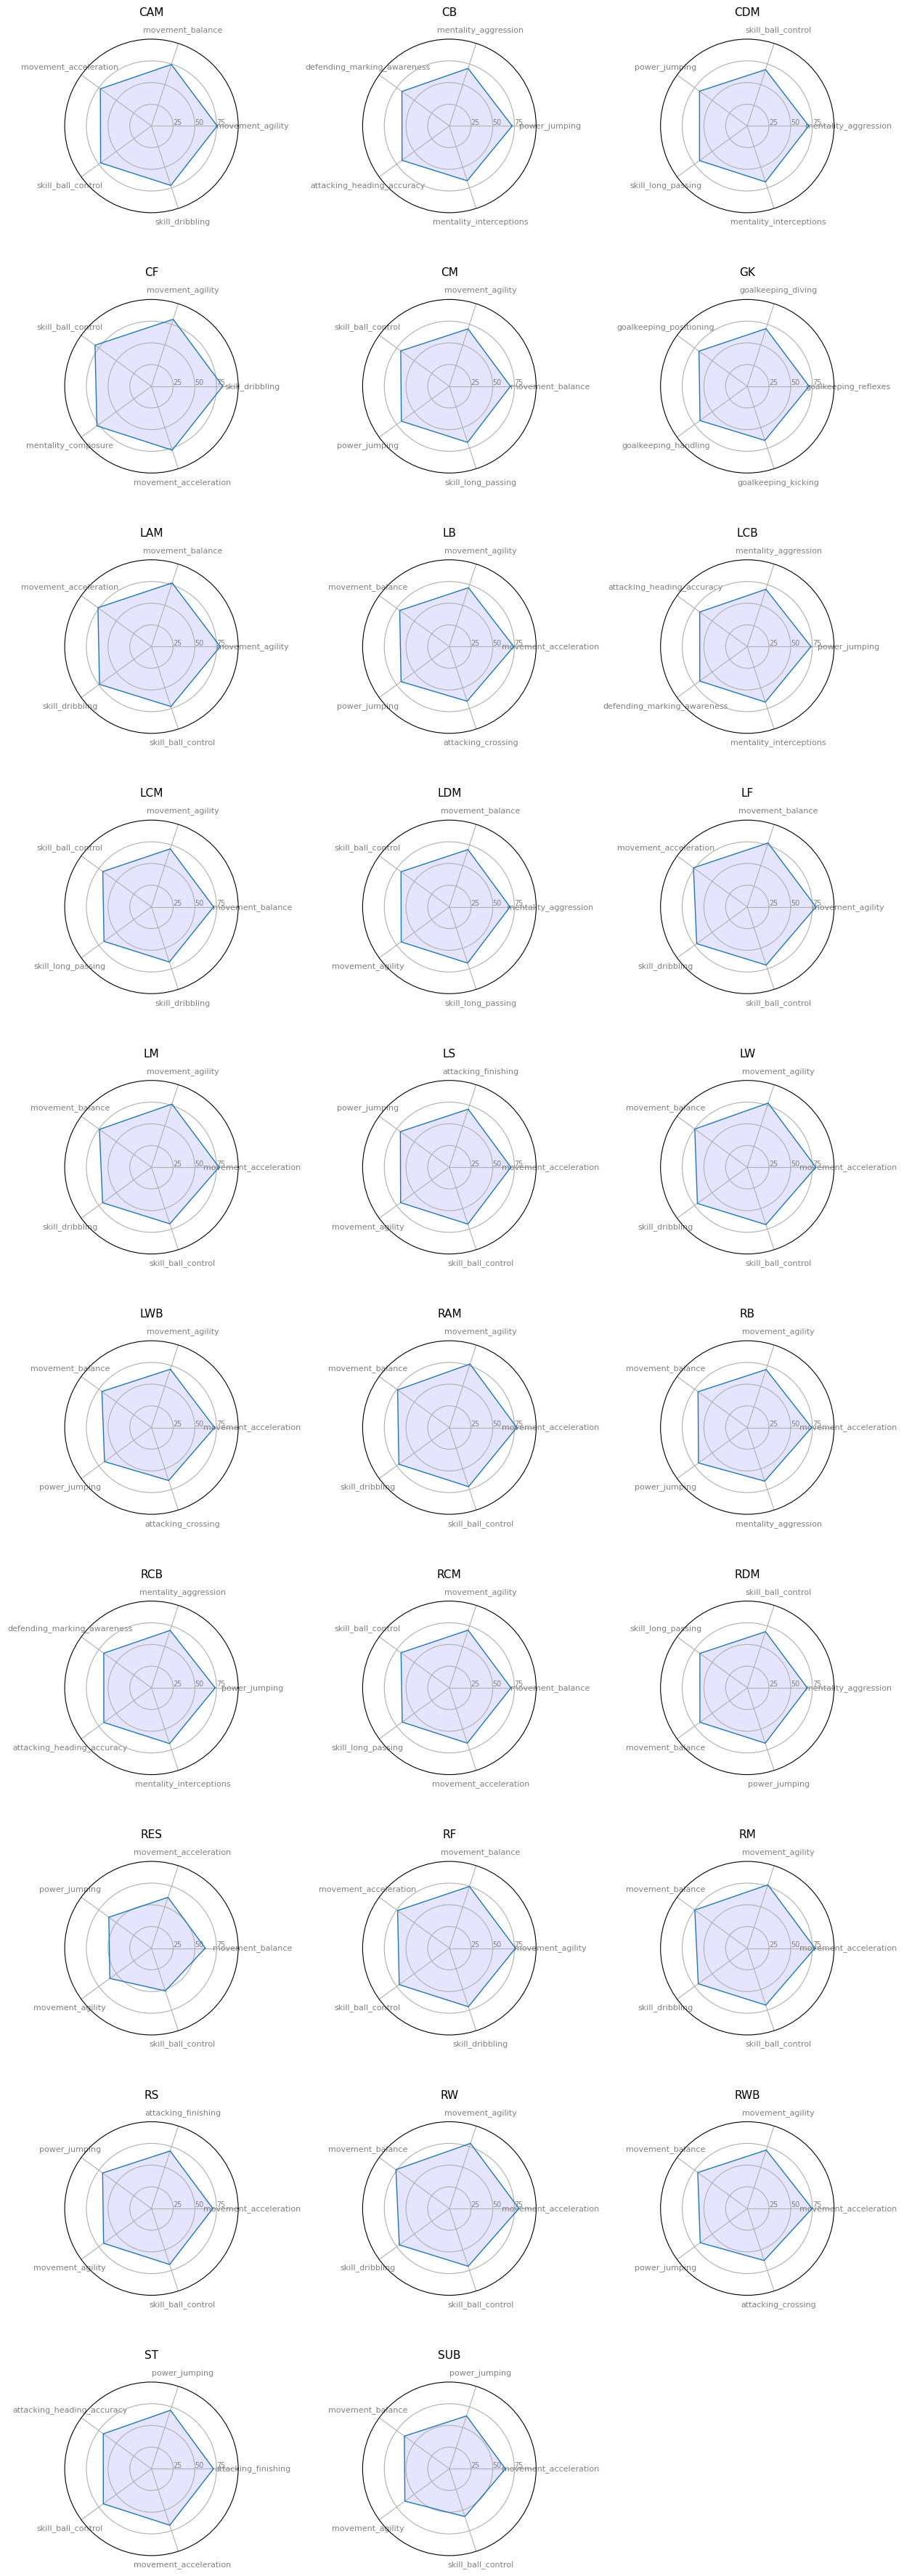

In [53]:
player_features = (
    'movement_acceleration', 'movement_agility', 'mentality_aggression', 
    'movement_balance', 'skill_ball_control', 'mentality_composure', 
    'attacking_crossing', 'skill_dribbling', 'skill_fk_accuracy', 
    'attacking_finishing', 'goalkeeping_diving', 'goalkeeping_handling', 
    'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 
    'attacking_heading_accuracy', 'mentality_interceptions', 'power_jumping', 
    'skill_long_passing', 'power_long_shots', 'defending_marking_awareness', 'mentality_penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in Fifa_22_database.groupby(Fifa_22_database['club_position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)
    
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

In [54]:
# Most valued player
most_valued_player = Fifa_22_database.loc[Fifa_22_database['value_eur'].idxmax()]
print('Most valued player:')
print(most_valued_player['short_name'])  # Assuming the player's name is stored in the 'short_name' column

# Highest earner
highest_earner = Fifa_22_database.loc[Fifa_22_database['wage_eur'].idxmax()]
print('\nHighest earner:')
print(highest_earner['short_name'])  # Assuming the player's name is stored in the 'short_name' column

print("--" * 40)
print("\nTop Earners:")
# Sorting the DataFrame by 'wage_eur' in descending order to get the top earners
top_earners = Fifa_22_database.sort_values(by='wage_eur', ascending=False).head(10)
print(top_earners[['short_name', 'wage_eur']])


Most valued player:
K. Mbappé

Highest earner:
K. De Bruyne
--------------------------------------------------------------------------------

Top Earners:
           short_name  wage_eur
4        K. De Bruyne  350000.0
11         K. Benzema  350000.0
0            L. Messi  320000.0
14           Casemiro  310000.0
24           T. Kroos  310000.0
27        R. Sterling  290000.0
2   Cristiano Ronaldo  270000.0
3           Neymar Jr  270000.0
1      R. Lewandowski  270000.0
17           M. Salah  270000.0


In [55]:
#Data Cleaning and removing NaN values to null values(0's)

columns_required_only = ['short_name', 'overall', 'potential', 'age', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
Fifa_22_database = Fifa_22_database[columns_required_only].fillna(0) #fillna() is the function which replaces NaN's to 0's


In [56]:
Fifa_22_database.head(50)

,short_name,overall,potential,age,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,93,93,34,4,4,85.0,92.0,91.0,95.0,34.0,65.0
1,R. Lewandowski,92,92,32,4,4,78.0,92.0,79.0,86.0,44.0,82.0
2,Cristiano Ronaldo,91,91,36,4,5,87.0,94.0,80.0,88.0,34.0,75.0
3,Neymar Jr,91,91,29,5,5,91.0,83.0,86.0,94.0,37.0,63.0
4,K. De Bruyne,91,91,30,5,4,76.0,86.0,93.0,88.0,64.0,78.0
5,J. Oblak,91,93,28,3,1,0.0,0.0,0.0,0.0,0.0,0.0
6,K. Mbappé,91,95,22,4,5,97.0,88.0,80.0,92.0,36.0,77.0
7,M. Neuer,90,90,35,4,1,0.0,0.0,0.0,0.0,0.0,0.0
8,M. ter Stegen,90,92,29,4,1,0.0,0.0,0.0,0.0,0.0,0.0
9,H. Kane,90,90,27,5,3,70.0,91.0,83.0,83.0,47.0,83.0


In [57]:
Fifa_22_database.isnull().sum()

short_name     0
overall        0
potential      0
age            0
weak_foot      0
skill_moves    0
pace           0
shooting       0
passing        0
dribbling      0
defending      0
physic         0
dtype: int64

In [58]:
#Graphical Representation of each entity/column

def plt_df(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])

    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Box Plot")

    plt.show()


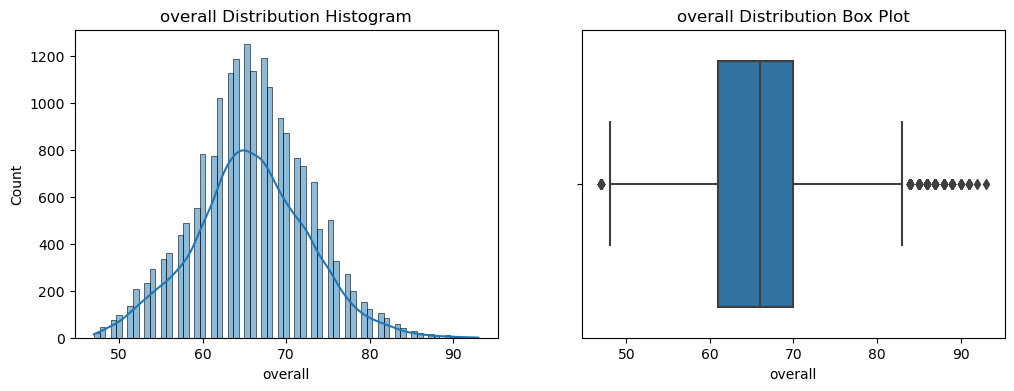

In [59]:
plt_df(Fifa_22_database,'overall')

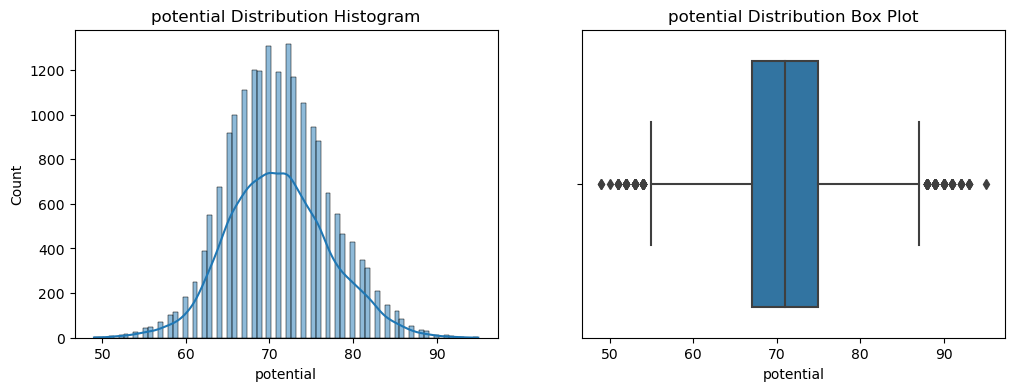

In [60]:
plt_df(Fifa_22_database,'potential')

In [61]:
#Create a new column and add all skill attributes to one column
import os
Fifa_22_database['Players Skill Set (In Total)'] = 0

# Save the updated dataset
Fifa_22_database.to_csv("Fifa22updates.csv", index=False)
current_directory = os.getcwd()

# Print the location of the saved CSV file
print("The CSV file is saved in the following location:")
print(current_directory + "\\Fifa22updates.csv")  # On Windows

Fifa_22_database

The CSV file is saved in the following location:
C:\Users\welcome\Fifa22updates.csv


,short_name,overall,potential,age,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,Players Skill Set (In Total)
0,L. Messi,93,93,34,4,4,85.0,92.0,91.0,95.0,34.0,65.0,0
1,R. Lewandowski,92,92,32,4,4,78.0,92.0,79.0,86.0,44.0,82.0,0
2,Cristiano Ronaldo,91,91,36,4,5,87.0,94.0,80.0,88.0,34.0,75.0,0
3,Neymar Jr,91,91,29,5,5,91.0,83.0,86.0,94.0,37.0,63.0,0
4,K. De Bruyne,91,91,30,5,4,76.0,86.0,93.0,88.0,64.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,47,52,22,3,2,58.0,35.0,46.0,48.0,42.0,49.0,0
19235,C. Porter,47,59,19,3,2,59.0,39.0,50.0,46.0,41.0,51.0,0
19236,N. Logue,47,55,21,3,2,60.0,37.0,45.0,49.0,41.0,52.0,0
19237,L. Rudden,47,60,19,3,2,68.0,46.0,36.0,48.0,15.0,42.0,0


In [62]:
# Calculate the average skill set score and round it
Fifa_22_database['Players Skill Set (In Total)'] = (Fifa_22_database["pace"] + Fifa_22_database["shooting"] + 
                                                  Fifa_22_database["passing"] + Fifa_22_database["dribbling"] + 
                                                  Fifa_22_database["defending"]) / 5

Fifa_22_database['Players Skill Set (In Total)'] = Fifa_22_database['Players Skill Set (In Total)'].round()

# Save the updated dataset to a CSV file named "Fifa22updates.csv"
Fifa_22_database.to_csv("Fifa22updates.csv", index=False)

# Apply a mapping to convert skill set scores into 0's and 1's based on the condition
Fifa_22_database['Players Skill Set (In Total)'] = Fifa_22_database['Players Skill Set (In Total)'].map(lambda x: 1 if x >= 60.0 else 0)

Fifa_22_database

,short_name,overall,potential,age,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,Players Skill Set (In Total)
0,L. Messi,93,93,34,4,4,85.0,92.0,91.0,95.0,34.0,65.0,1
1,R. Lewandowski,92,92,32,4,4,78.0,92.0,79.0,86.0,44.0,82.0,1
2,Cristiano Ronaldo,91,91,36,4,5,87.0,94.0,80.0,88.0,34.0,75.0,1
3,Neymar Jr,91,91,29,5,5,91.0,83.0,86.0,94.0,37.0,63.0,1
4,K. De Bruyne,91,91,30,5,4,76.0,86.0,93.0,88.0,64.0,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,47,52,22,3,2,58.0,35.0,46.0,48.0,42.0,49.0,0
19235,C. Porter,47,59,19,3,2,59.0,39.0,50.0,46.0,41.0,51.0,0
19236,N. Logue,47,55,21,3,2,60.0,37.0,45.0,49.0,41.0,52.0,0
19237,L. Rudden,47,60,19,3,2,68.0,46.0,36.0,48.0,15.0,42.0,0


In [63]:
#Split Data into features and targets

X = Fifa_22_database[['overall','potential','weak_foot','skill_moves']]
Y = Fifa_22_database.iloc[:,-1]

# Check the class distribution before oversampling
print("Class distribution before oversampling:")
print(Y.value_counts())

from imblearn.over_sampling import RandomOverSampler
# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy='minority')

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, Y)

# Check the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Convert the resampled data back to a Pandas DataFrame
data_resampled = pd.DataFrame(np.concatenate([X_resampled, y_resampled.values.reshape(-1,1)], axis=1))

# Save the resampled data to a new file
data_resampled.to_csv(".csv", index=False)

Class distribution before oversampling:
0    11487
1     7752
Name: Players Skill Set (In Total), dtype: int64

Class distribution after oversampling:
1    11487
0    11487
Name: Players Skill Set (In Total), dtype: int64


In [64]:
#Train Test split model version
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=0)
accuracy_scores = []

#K neighbors classification 
kNN = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
kNN.fit(X_train, Y_train)

Y_pred_knn = kNN.predict(X_test)

# Get the accuracy score
accuracy = 100*accuracy_score(Y_test, Y_pred_knn)
print("Accuracy: {:.2f}%".format(accuracy))

# Get the classification report
cls_rpt = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", cls_rpt)

accuracy_scores.append(accuracy_score(Y_test, Y_pred_knn))

Accuracy: 81.45%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4083
           1       0.82      0.75      0.78      2651

    accuracy                           0.84      6734
   macro avg       0.83      0.82      0.83      6734
weighted avg       0.84      0.84      0.84      6734



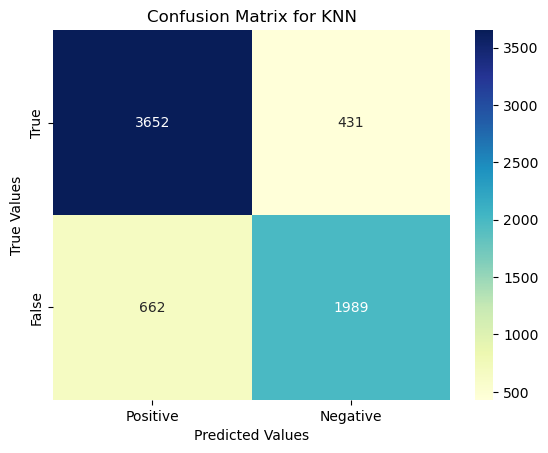

In [65]:
confusion = confusion_matrix(Y_test, Y_pred)

# Convert the confusion matrix into a data frame
confusion_df = pd.DataFrame(confusion, index=["True", "False"], columns=["Positive", "Negative"])

# Plot the confusion matrix
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for KNN")
plt.show()

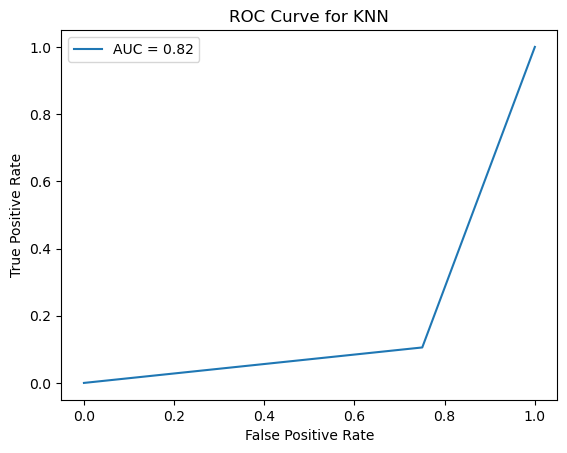

In [66]:
y_true = [0 if y == 1.0 else 1 for y in Y_test]

# Get the ROC AUC score
auc = roc_auc_score(Y_test, Y_pred)

# Get the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, Y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend()
plt.show()

In [67]:
perm = PermutationImportance(kNN, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1707 ± 0.0042,overall
0.1037 ± 0.0066,skill_moves
0.0097 ± 0.0078,potential
0.0020 ± 0.0038,weak_foot


In [68]:
# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=10, random_state=45)
clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_dt = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Get the classification report
cls_rpt = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", cls_rpt)

accuracy_scores.append(accuracy_score(Y_test, Y_pred_dt))

Accuracy: 82.30%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4083
           1       0.82      0.75      0.78      2651

    accuracy                           0.84      6734
   macro avg       0.83      0.82      0.83      6734
weighted avg       0.84      0.84      0.84      6734



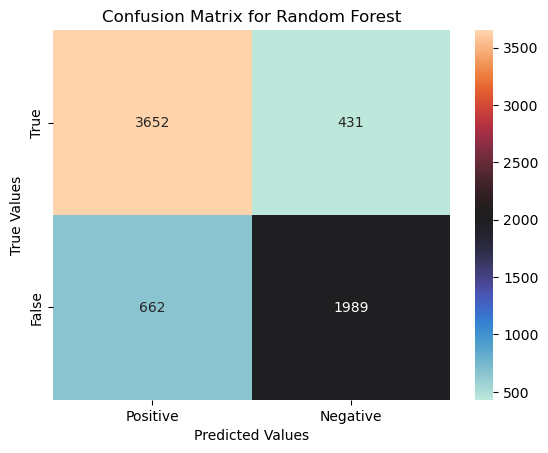

In [69]:
confusion = confusion_matrix(Y_test, Y_pred)

# Convert the confusion matrix into a data frame
confusion_df = pd.DataFrame(confusion, index=["True", "False"], columns=["Positive", "Negative"])

# Plot the confusion matrix as a bar plot
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="icefire")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Random Forest")
plt.show()

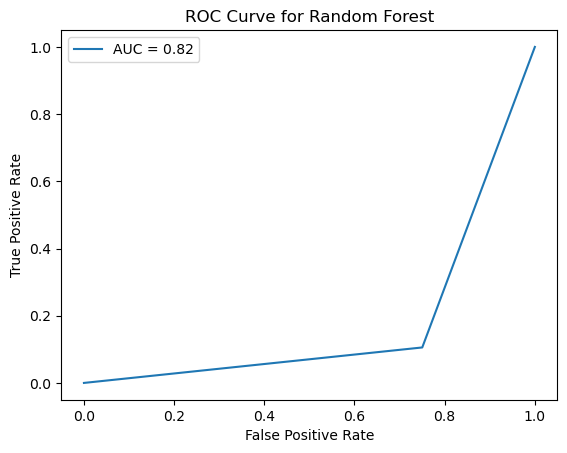

In [70]:
y_true = [0 if y == 1.0 else 1 for y in Y_test]

# Get the ROC AUC score
auc = roc_auc_score(Y_test, Y_pred)

# Get the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, Y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

In [71]:
perm = PermutationImportance(clf, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1530 ± 0.0088,overall
0.1185 ± 0.0044,skill_moves
0.0085 ± 0.0050,potential
0.0031 ± 0.0062,weak_foot


In [72]:
# Train a support vector machine classifier
SVM_train = SVC(kernel='rbf', C=1, gamma=0.1, random_state=45)
SVM_train.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svm = SVM_train.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Get the classification report
cls_rpt = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", cls_rpt)

accuracy_scores.append(accuracy_score(Y_test, Y_pred_svm))

Accuracy: 83.77%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4083
           1       0.82      0.75      0.78      2651

    accuracy                           0.84      6734
   macro avg       0.83      0.82      0.83      6734
weighted avg       0.84      0.84      0.84      6734



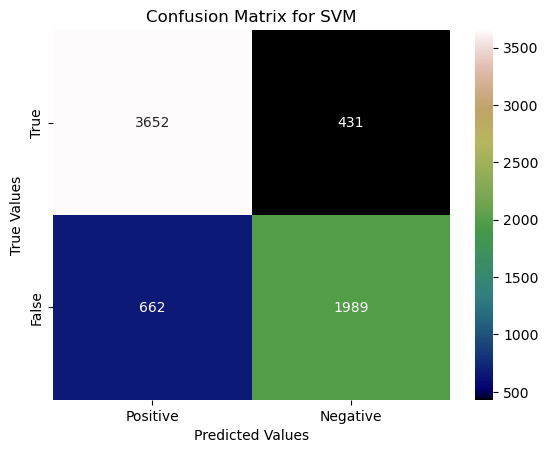

In [73]:
confusion = confusion_matrix(Y_test, Y_pred)

# Convert the confusion matrix into a data frame
confusion_df = pd.DataFrame(confusion, index=["True", "False"], columns=["Positive", "Negative"])

# Plot the confusion matrix as a bar plot
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="gist_earth")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for SVM")
plt.show()

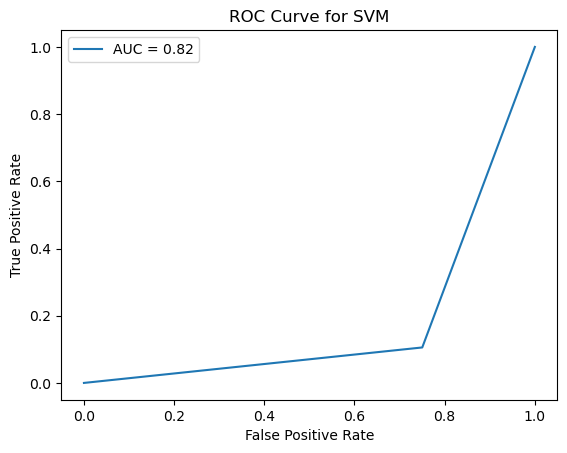

In [74]:
y_true = [0 if y == 1.0 else 1 for y in Y_test]

# Get the ROC AUC score
auc = roc_auc_score(Y_test, Y_pred)

# Get the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, Y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.show()

In [75]:
perm = PermutationImportance(SVM_train, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1488 ± 0.0078,overall
0.1312 ± 0.0075,skill_moves
0.0775 ± 0.0071,potential
0.0004 ± 0.0007,weak_foot


In [76]:
#Players "Weak_Foot" is making the players to low the skill rates.
#Now by using the machine learning algorithms, we are going to improve the Weak_foot and update with new accuracy of players performance

low_weak_foot_threshold = 2

# Update weak_foot for players with a low weak foot value
Fifa_22_database.loc[Fifa_22_database['weak_foot'] < low_weak_foot_threshold, 'weak_foot'] = 4

In [77]:
# Step 2: Re-run the models with updated data 

# Split data into features (X) and targets (Y)
X = Fifa_22_database[['overall', 'potential', 'weak_foot', 'skill_moves']]
Y = Fifa_22_database['Players Skill Set (In Total)']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=0)

In [78]:
accuracy_scores_updated=[]

#K neighbors classification 
kNN = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
kNN.fit(X_train, Y_train)

Y_pred_knn1 = kNN.predict(X_test)

# Calculate permutation importance
perm = PermutationImportance(kNN, random_state=1).fit(X_test, Y_test)

# Show feature weights
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

# Step 4: Provide targeted training (This step is not implemented in code as it requires external game functionality)

# Step 5: Evaluate the improvement
# Calculate the accuracy score after the improvement
accuracy_after_improvement = accuracy_score(Y_test, Y_pred_knn1)
print("Accuracy after weak foot improvement: {:.2f}%".format(accuracy_after_improvement * 100))

accuracy_scores_updated.append(accuracy_score(Y_test, Y_pred_knn1))

Accuracy after weak foot improvement: 82.00%


In [79]:
#Random Forest classification 
clf = RandomForestClassifier(n_estimators=10, random_state=45)
clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_dt1 = clf.predict(X_test)

# Calculate permutation importance
perm = PermutationImportance(kNN, random_state=1).fit(X_test, Y_test)

# Show feature weights
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

# Step 4: Provide targeted training (This step is not implemented in code as it requires external game functionality)

# Step 5: Evaluate the improvement
# Calculate the accuracy score after the improvement
accuracy_after_improvement = accuracy_score(Y_test, Y_pred_dt1)
print("Accuracy after weak foot improvement: {:.2f}%".format(accuracy_after_improvement * 100))

accuracy_scores_updated.append(accuracy_score(Y_test, Y_pred_dt1))

Accuracy after weak foot improvement: 82.31%


In [80]:
#SVM classification 
SVM_train = SVC(kernel='rbf', C=1, gamma=0.1, random_state=45)
SVM_train.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svm1 = SVM_train.predict(X_test)

# Calculate permutation importance
perm = PermutationImportance(kNN, random_state=1).fit(X_test, Y_test)

# Show feature weights
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

# Step 4: Provide targeted training (This step is not implemented in code as it requires external game functionality)

# Step 5: Evaluate the improvement
# Calculate the accuracy score after the improvement
accuracy_after_improvement = accuracy_score(Y_test, Y_pred_svm1)
print("Accuracy after weak foot improvement: {:.2f}%".format(accuracy_after_improvement * 100))

accuracy_scores_updated.append(accuracy_score(Y_test, Y_pred_svm1))

Accuracy after weak foot improvement: 83.77%


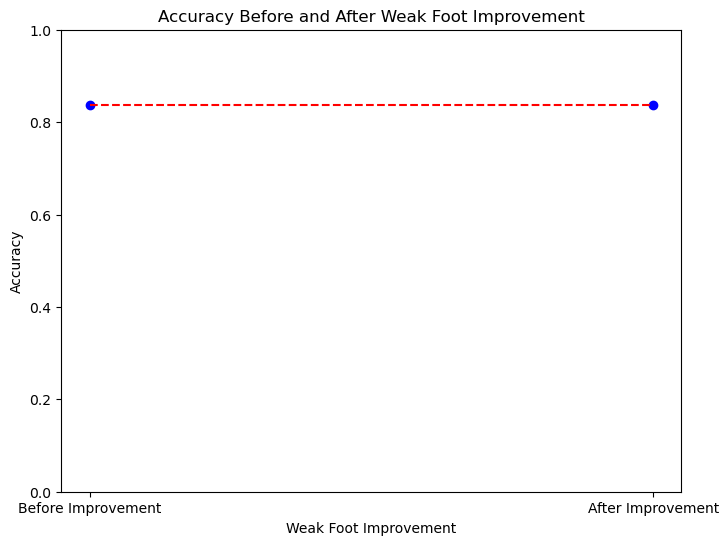

In [85]:
#From Above SVM is the Best Machine Learning Model for Finding the Player's Performance levels

#SVM classification 
SVM_train = SVC(kernel='rbf', C=1, gamma=0.1, random_state=45)
SVM_train.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = SVM_train.predict(X_test)

# Plot the scatter plot
x_values = np.array([0, 1])
y_values = np.array([accuracy, accuracy_after_improvement])

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, y_values, color='red', linestyle='dashed')
plt.xticks(x_values, ['Before Improvement', 'After Improvement'])
plt.xlabel('Weak Foot Improvement')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Weak Foot Improvement')
plt.ylim(0, 1)
plt.show()

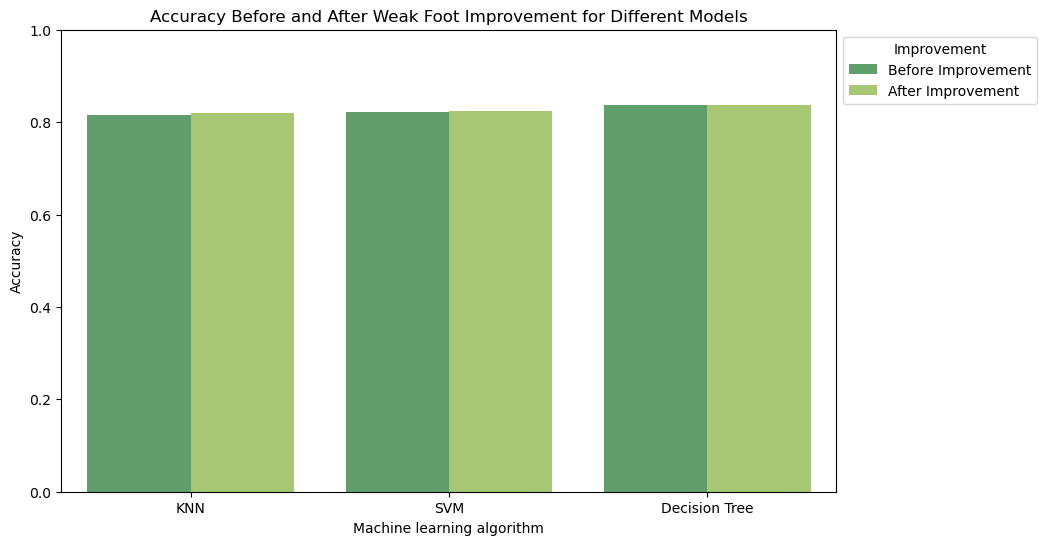

In [86]:
#Data Visualisation of Weak foot improvement of players for next update release

accuracy_of_all_models = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Decision Tree'],
    'Before Improvement': accuracy_scores,
    'After Improvement': accuracy_scores_updated
})


# Melt the DataFrame to make it suitable for visualization
accuracy_data_melted = pd.melt(accuracy_of_all_models, id_vars=['Model'], var_name='Improvement', value_name='Accuracy')

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_data_melted, x='Model', y='Accuracy', hue='Improvement', palette='summer')
plt.ylim(0, 1)
plt.xlabel('Machine learning algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Weak Foot Improvement for Different Models')
plt.legend(title='Improvement', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()